In [2]:
##FinalGaiaAnalysis
import numpy as np
import math
from astropy.io import fits
import matplotlib.pyplot as plt
import scipy, pylab
import matplotlib.patches as mpatches

In [3]:
gaiaData = fits.getdata("1533756965904O-result.fits")

In [4]:
gaiaData = gaiaData[np.where(gaiaData["parallax"] > 0)]
print(len(gaiaData))
print(len(np.unique(gaiaData["objid"])))
unresolvestars = len(gaiaData)-len(np.unique(gaiaData["objid"]))
print("There are " + str(unresolvestars) + " stars resolved by Gaia and not Atlas")

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


4094401
4089460
There are 4941 stars resolved by Gaia and not Atlas


In [5]:
gaiaDist = 1/(gaiaData["parallax"][np.where(gaiaData["parallax"])]/1000)

In [18]:
##absoluteGBand = gaiaData["phot_g_mean_mag"][0] - 5 * math.log10(gaiaDist[0]/10)

In [6]:
absoluteGBand = gaiaData["phot_g_mean_mag"] - (5 * np.log10(gaiaDist/10))

In [7]:
nearby = np.where(gaiaData["parallax"] > 10)
highsnr = np.where(gaiaData["parallax_over_error"] > 15)
tensnr = np.where(gaiaData["parallax_over_error"] > 10)
print(len(tensnr[0]))
eightsnr = np.where(gaiaData["parallax_over_error"] > 8)

1573541


In [8]:
VariableStarsID = open('VariableStarsID.txt')
data = VariableStarsID.readlines()
VariableStarData = []
for line in data:
    VariableStarData.append(np.asarray(line.split("-")[0:2]))
VariableStarData = np.asarray(VariableStarData)

In [9]:
indexes = []
for i in VariableStarData:
    indexes.append(np.where(gaiaData["objid"] == int(i[1]))[0])


In [10]:
##don't use
vStarsData = []
for i in range(0,len(indexes)):
    if (indexes[i].size != 0):
        array = (VariableStarData[i][0], VariableStarData[i][1], indexes[i][0])
        vStarsData.append(np.asarray(array))
vStarsData = np.asarray(vStarsData)
RRLyrae = np.asarray(vStarsData[0:12])
Cyg =vStarsData[12]
##print((Cyg))
Mira = vStarsData[13]
##print((Mira))
CV = vStarsData[14:len(vStarsData)]
##print((CV))


In [11]:
vStarsData = []
for i in range(0,len(indexes)):
    if (indexes[i].size != 0):
        array = (VariableStarData[i][0], VariableStarData[i][1], indexes[i][0])
        vStarsData.append(np.asarray(array))
vStarsData = np.asarray(vStarsData)
uniqueTypes = np.unique(vStarsData[:,0])

In [12]:
colors = ["blue", "green", "yellow", "orange", "violet", "pink", "cyan", "red", "purple"]

In [13]:
idArray = []
for i in uniqueTypes:
    indices = vStarsData[:,2][np.where(i == vStarsData[:,0])]
    idArray.append([i, indices])

In [14]:
print(idArray)

[['Cataclysmic Variable', array(['3470176', '195400', '195400', '3123041', '3898550', '3949340'],
      dtype='<U25')], ['Cephied', array(['911851', '915689', '1144285', '1336855', '1342227', '3123688',
       '1652238', '109015', '1341726', '2097194', '3941904'], dtype='<U25')], ['Contact Eclipsing Binary', array(['1153801', '1154212', '3966399', '929196', '3966262', '454386',
       '2615332'], dtype='<U25')], ['Detached Eclipsing Binary', array(['1355985', '926251', '2103747', '1355989', '1655383', '1355986'],
      dtype='<U25')], ['Mira', array(['3453563', '2057637'], dtype='<U25')], ['RRLyrae', array(['2097009', '1342097', '2609994', '3950183', '1144914', '3148',
       '915928', '3456939', '2096912', '3012', '3123837', '3950268'],
      dtype='<U25')], ['Rotating', array(['455193', '2891678', '229915', '2891833', '1134984', '1830147',
       '3449818', '97493', '455497', '2892672', '97127', '1829972',
       '3449214', '1329377', '2892937'], dtype='<U25')]]


In [50]:
posterPlots = open("identifiedStarsID.txt")
posterData = posterPlots.readlines()
posterID = []
for i in posterData:
    ids = i.split("-")
    posterID.append(ids[0])
locations = []
for i in posterID:
    locations.append(np.where(gaiaData["objid"] == int(i))[0])
locations = np.asarray(locations)

<function matplotlib.pyplot.show>

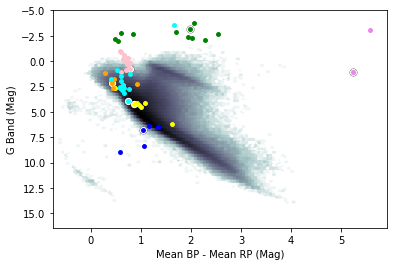

In [75]:
ax = pylab.subplot(111)
xaxis = np.asarray(gaiaData["phot_bp_mean_mag"]-gaiaData["phot_rp_mean_mag"])
plt.hexbin(xaxis[highsnr], absoluteGBand[highsnr], bins = "log", mincnt = 1, cmap = "bone_r")

for i in locations:
    x = i[0]
    plt.scatter(xaxis[x.astype("int")], absoluteGBand[x.astype("int")], color = "black", s = 45)
    plt.scatter(xaxis[x.astype("int")], absoluteGBand[x.astype("int")], color = "white", s = 40)

counter = 0
for i in idArray:
    plt.scatter(xaxis[i[1].astype("int")], absoluteGBand[i[1].astype("int")], color = colors[counter], label = str(i[0]), s = 15)
    ##patch = mpatches.Patch(color=colors[counter], label=i[0])
    ##plt.legend(handles=[patch])   
    
    
    counter += 1

##plt.scatter(xaxis[RRLyrae[:,2].astype("int")], absoluteGBand[RRLyrae[:,2].astype("int")], color = "blue")

##plt.scatter(xaxis[Cyg[2].astype("int")], absoluteGBand[Cyg[2].astype("int")], color = "green")

##plt.scatter(xaxis[Mira[2].astype("int")], absoluteGBand[Mira[2].astype("int")], color = "red")

##plt.scatter(xaxis[CV[:,2].astype("int")], absoluteGBand[CV[:,2].astype("int")], color = "yellow")

plt.xlabel("Mean BP - Mean RP (Mag)")
plt.ylabel('G Band (Mag)')
plt.gca().invert_yaxis()
plt.savefig(r"C:\Users\20xha\Documents\GitHub\GaiaDataFinal\HRDiagramAllGaia.png", dpi = 4000, bbox_inches = 'tight' )
plt.show
##plt.legend(loc='upper center', bbox_to_anchor=(.4, 1.27),
##          ncol=3, fancybox=True, shadow=True)
##plt.savefig(r"C:\Users\20xha\Documents\GitHub\GaiaDataFinal\HRDiagramAllGaia2.png", dpi = 4000, bbox_inches = 'tight' )

In [50]:
import csv
with open('GaiaIDs.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(["ObjID"])
    for row in vStarsData:
        spamwriter.writerow([str(row[1])])
        print(row[1])

66190995651609644
67770499494009631
68981643143109271
71361669785303265
74052095439100100
75961900013200435
78850825871108159
81692245328301550
84170608007406508
84590137048708586
85821198547302951
112771557072503235
160303256789904093
66481174567006865
76942176269107619
76942176269107619
93891736964500331
102613099071507822
171691551104701670
99311113987008637
108831071887005803
109060755669408952
120702626770801486
126690986794508318
129520885271406526
72141027825406136
72251894332406069
72471148712800521
72601350867205270
73051576168706916
74601354649407778
74820933271101019
69391169647704681
73951184901409151
86851084267306035
88493500733103705
90282867041404473
119600977207208198
136941928851107727
150762994420703863
158951450526608227
168140649276799484
174783270861000903
66021671933000712
66101686624900932
66170951914207432
69181404183805700
69392143289808905
71172134585007588
72370926560204617
72651256178205742
75461016013606525
76440706053209677
77610876202603910
7844098199310